In [4]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from yellowbrick.target import FeatureCorrelation

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

from collections import defaultdict
import difflib

import warnings
warnings.filterwarnings("ignore")

In [5]:
spotify_df = pd.read_csv("/Users/pasqualeiuliano/Documents/AI/spotify/data/data.csv")
artist_data = pd.read_csv("/Users/pasqualeiuliano/Documents/AI/spotify/data/data_by_artist.csv")
data_by_genres = pd.read_csv("/Users/pasqualeiuliano/Documents/AI/spotify/data/data_by_genres.csv")
data_w_genres = pd.read_csv("/Users/pasqualeiuliano/Documents/AI/spotify/data/data_w_genres.csv")
year_data = pd.read_csv("/Users/pasqualeiuliano/Documents/AI/spotify/data/data_by_year.csv")

spotify_df.loc[spotify_df['artists'] == "['Stormzy']"]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year


In [6]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [7]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

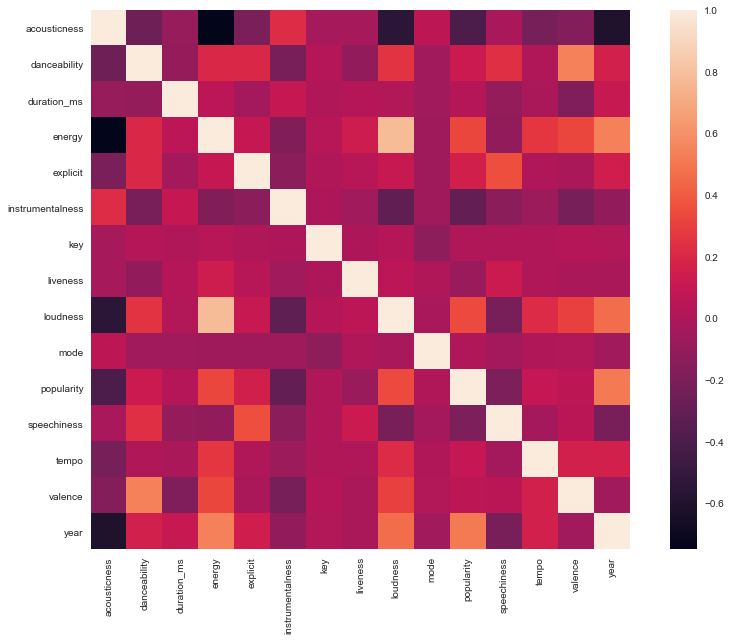

In [8]:
# creating a correlation matrix
corr = spotify_df.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()

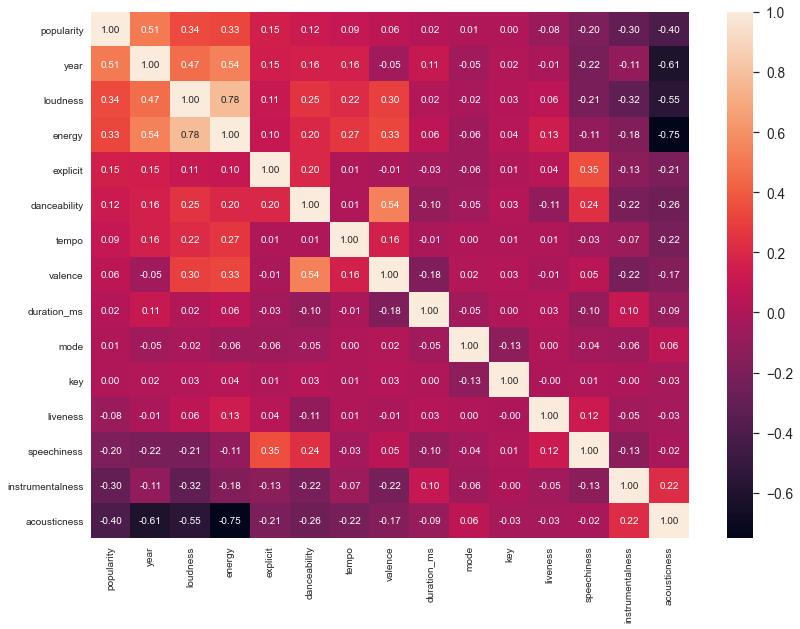

In [9]:
# number of variables to be selected
k = 20
corr = spotify_df.corr()

# finding the most correlated variables
cols = corr.nlargest(k, 'popularity')['popularity'].index
cm = np.corrcoef(spotify_df[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'chinese electropop'),
  Text(1, 0, 'korean mask singer'),
  Text(2, 0, 'yaoi'),
  Text(3, 0, 'dutch rap pop'),
  Text(4, 0, 'rochester mn indie'),
  Text(5, 0, 'dong-yo'),
  Text(6, 0, 'afroswing'),
  Text(7, 0, 'j-rap'),
  Text(8, 0, 'estonian pop'),
  Text(9, 0, 'irish pop'),
  Text(10, 0, 'musical advocacy'),
  Text(11, 0, 'alberta hip hop'),
  Text(12, 0, 'channel islands indie'),
  Text(13, 0, 'newcastle nsw indie'),
  Text(14, 0, 'instrumental grime'),
  Text(15, 0, 'guatemalan pop'),
  Text(16, 0, 'rock chapin'),
  Text(17, 0, 'swedish tropical house'),
  Text(18, 0, 'london rap'),
  Text(19, 0, 'japanese teen pop')])

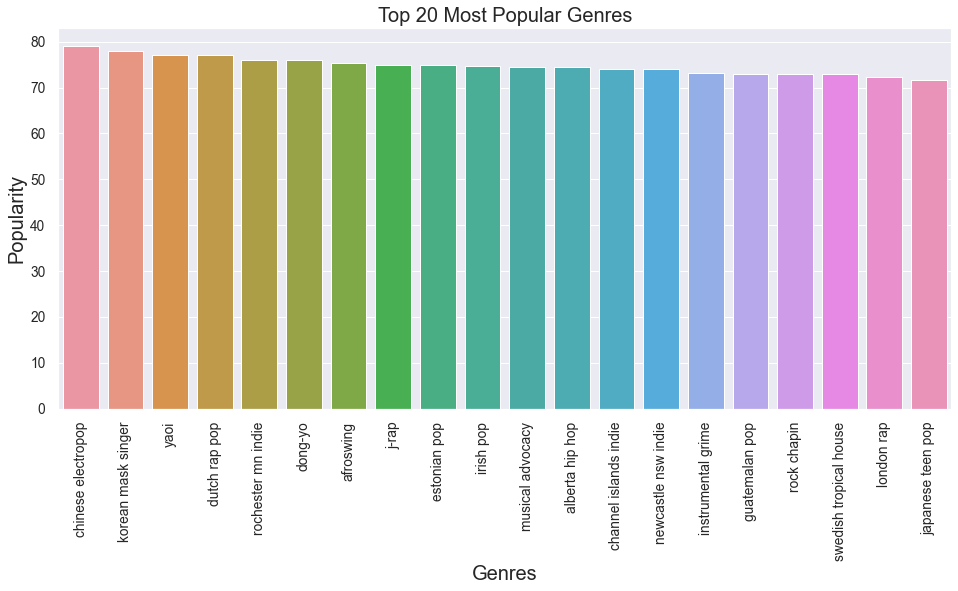

In [10]:
# Top 20 Popular Genres
fig, axis = plt.subplots(figsize = (16, 7))
popular_genres = data_by_genres.groupby("genres")['popularity'].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(popular_genres.index, popular_genres)
axis.set_title("Top 20 Most Popular Genres", fontsize=20)
axis.set_xlabel('Genres', fontsize=20)
axis.set_ylabel('Popularity', fontsize=20)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'drivers license'),
  Text(1, 0, 'Mood (feat. iann dior)'),
  Text(2, 0, 'positions'),
  Text(3, 0, 'Therefore I Am'),
  Text(4, 0, 'Whoopty'),
  Text(5, 0, 'LA NOCHE DE ANOCHE'),
  Text(6, 0, 'WITHOUT YOU'),
  Text(7, 0, '34+35'),
  Text(8, 0, 'What You Know Bout Love'),
  Text(9, 0, 'DÁKITI'),
  Text(10, 0, 'you broke me first'),
  Text(11, 0, 'The Business'),
  Text(12, 0, 'Lonely (with benny blanco)'),
  Text(13, 0, "Hecha Pa' Mi"),
  Text(14, 0, 'HOLIDAY'),
  Text(15, 0, 'Anyone'),
  Text(16, 0, 'WAP (feat. Megan Thee Stallion)'),
  Text(17, 0, 'Head & Heart (feat. MNEK)'),
  Text(18, 0, 'La Nota'),
  Text(19, 0, 'For The Night (feat. Lil Baby & DaBaby)')])

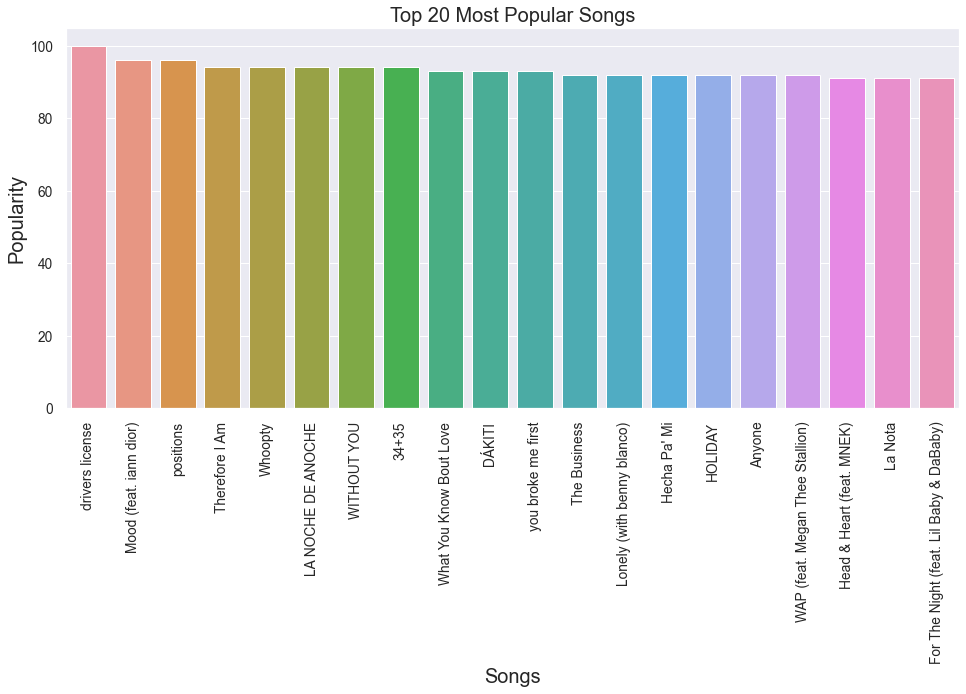

In [11]:
# Top 20 Popular Songs
fig, axis = plt.subplots(figsize = (16, 7))
popular_songs = spotify_df.groupby('name')['popularity'].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(popular_songs.index, popular_songs)
axis.set_title("Top 20 Most Popular Songs", fontsize=20)
axis.set_xlabel("Songs", fontsize=20)
axis.set_ylabel("Popularity", fontsize=20)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'CJ'),
  Text(1, 0, 'Boza'),
  Text(2, 0, 'Joel Corry'),
  Text(3, 0, 'Juhn'),
  Text(4, 0, 'Ritt Momney'),
  Text(5, 0, 'Lele Pons'),
  Text(6, 0, 'Los Legendarios'),
  Text(7, 0, 'KIDDO'),
  Text(8, 0, 'Nuka'),
  Text(9, 0, 'Jerry Di'),
  Text(10, 0, 'DJ Nelson'),
  Text(11, 0, 'Emilee'),
  Text(12, 0, 'Jay Wheeler'),
  Text(13, 0, 'Surf Mesa'),
  Text(14, 0, 'Chencho Corleone'),
  Text(15, 0, 'Tones And I'),
  Text(16, 0, 'Regard'),
  Text(17, 0, 'HVME'),
  Text(18, 0, 'THE SCOTTS'),
  Text(19, 0, 'Sam Fischer')])

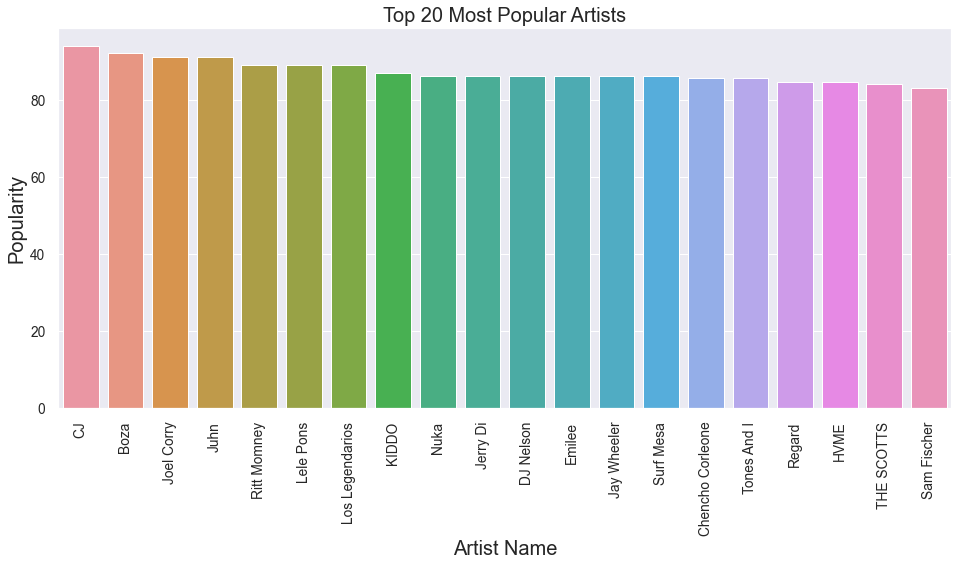

In [12]:
fig, axis = plt.subplots(figsize = (16,7))
popular_artists = artist_data.groupby("artists")['popularity'].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(popular_artists.index, popular_artists)
axis.set_title("Top 20 Most Popular Artists", fontsize=20)
axis.set_xlabel("Artist Name", fontsize=20)
axis.set_ylabel("Popularity", fontsize=20)
plt.xticks(rotation = 90)


In [22]:
#%% K-Means Clustering
import joblib

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=20, n_jobs=-1))])
X = spotify_df.select_dtypes(np.number)
number_cols = list(X.columns)
cluster_pipeline.fit(X)
cluster_labels = cluster_pipeline.predict(X)
spotify_df['cluster_label'] = cluster_labels

joblib.dump(cluster_pipeline, 'spotify-model.pkl')

['spotify-model.pkl']

In [ ]:

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)

projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = spotify_df['name']
projection['cluster'] = spotify_df['cluster_label']

fig = px.scatter(projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

In [ ]:

SPOTIPY_CLIENT_ID = 'INSERT_CLIENT_ID_HERE'
SPOTIPY_CLIENT_SECRET = 'INSERT_CLIENT_SECRET_HERE'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='INSERT_CLIENT_ID_HERE',
                                                           client_secret='INSERT_CLIENT_SECRET_HERE'))

def find_song(name, artists):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} artists: {}'.format(name, artists), limit=1)
    
    if results['tracks']['items'] == []:
        return None
    
    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['artists'] = [artists]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value
    
    return pd.DataFrame(song_data)

In [ ]:


number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

def get_song_data(song, spotify_data):
    
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(song['name'], song['year'])
        

def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('The song: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()

    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            

    return flattened_dict


def recommend_songs( song_list, spotify_data, n_songs=100):
    
    metadata_cols = ['name', 'year', 'artists', 'popularity']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = cluster_pipeline.steps[0][1]

    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [ ]:
x = 'Passionfruit'
recommend_songs([
                {'name': x, 'year': 2017}
],  spotify_df)